<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Copy_of_Pr%C3%A1ctica_3_UD1_FeatEng_Incompleta_(CSV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3 Feature Engineering

**Importante**: Antes de empezar la práctica es necesario subir el fichero ".CSV" que contiene los datos para el desarrollo de la misma

Vamos a leer una base de datos con información proporcionada sobre el Estudio Nacional de Examen de Salud y Nutrición (NHANES) de EEUU. Nuestro objetivo será estudiar la distribución de la proteína albúmina (URXUMA en la BBDD) en muestras de orina de los pacientes que han realizado dicho examen, para identificar posibles valores fuera del rango normal que pudieran ser identificativos de problemas de salud relacionados con los riñones. Las unidades de medida son g/dL. El rango de valores normales de la proteína oscila entre 2 y 7 g/dL

Antes de nada instalamos la librería para leer el archivo

In [ ]:
!pip install ucimlrepo

Importamos las lirberías necesarias para llevar a cabo la práctica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Leemos el dataframe y seleccionamo la columna requerida

In [ ]:
df=pd.read_csv('ALB_CR_J.csv',sep=',')[['URXUMA']]

Hacemos un breve estudio de la información de proteína

In [ ]:
# Mostramos algunos registros de la proteína


In [ ]:
# Mostrarv algunos datos estadísticos


Realizamos un histograma

In [ ]:
# Obtener un primer Histograma y estudiar el caso


Vemos que no podemos sacar conclusiones de los datos que nos sean de utilidad porque hemos de diferenciar niveles que oscilan entre 3 y 7 g/dL y el rango que tenemos en el histograma llega hasta 14000

**Primera aplicación: Log Transfromation**

Aplicamos transformación logarítmica para estudiar la nueva distribución y obtener información con la que poder sacar conclusiones

In [ ]:
# Aplicar log transform al caso y estudiar la nueva distribución


Vemos que según lo visto en la parte teórica, la mayoría de valores se distribuyen entre 1 y 10 g/dL. Tenemos una buena parte con valores entre 10 y 100 y a partir de 100 encontramos pocos valores de pacientes

**Segunda aplicación: Transformación Box Cox**

Vamos a comprobar como funciona nuestra distribución si aplicamos una trasformación Box Cox

In [ ]:
# Aplicar Box-Cox Transform al caso y estudiar la nueva distribución


Hemos utilizado un valor lambda mayor que uno, que sería útil en caso de tener muchos valores muy altos en nuestra distribución. No es el caso, puesto que nuestra cola pesada es la cola izquierda. Utilizamos valores cercanos a 0:

In [ ]:
# Cómo varía con Lambda?


Calculamos los extremos del intervalo de interés () para interpretar los valores contenidos en dicho intervalo

In [ ]:
# ¿Cómo interpretamos el intervalo superior?


In [ ]:
# ¿Y el inferior?

La tendencia de la distribución de la albúmina en la muestra de pacientes es de una concentración alta de proteína, lo que puede dar lugar problemas de salud, más aún si nos fijamos en pacientes que superan los 10g/dL

Con respecto a la segunda parte de la práctica, leemos del repositorio UCI una base de datos relacionada con elementos incluidos en el vino, con las siguientes variables:


**fixed_acidity**: Representa la cantidad fija de ácidos totales en el vino, que no se evaporan fácilmente.

**volatile_acidity**: Indica la cantidad de ácidos volátiles en el vino. Niveles elevados pueden llevar a un sabor desagradable similar al vinagre.

**citric_acid**: Representa la cantidad de ácido cítrico en el vino, que puede contribuir a la frescura y la acidez.

**residual_sugar**: Indica la cantidad de azúcar residual en el vino después de la fermentación. Puede afectar el sabor y la dulzura del vino.

**chlorides**: Representa la cantidad de cloruros en el vino. Niveles elevados pueden dar un sabor salado.

**free_sulfur_dioxide**: Indica la cantidad de dióxido de azufre libre en el vino, que actúa como antioxidante y antimicrobiano.

**total_sulfur_dioxide**: Representa la cantidad total de dióxido de azufre (libre y combinado) en el vino.

**density**: La densidad del vino, que puede estar relacionada con el contenido de alcohol y azúcar.

**pH**: Mide la acidez o alcalinidad del vino. Un pH más bajo indica mayor acidez.

**sulphates**: Indica la cantidad de sulfatos en el vino. Pueden contribuir a la preservación y estabilidad del vino.

In [ ]:
wine = fetch_ucirepo(id=186)

df = wine.data.features

In [ ]:
# Mostrar el dataframe


In [ ]:
# Mostrar los valores estadísticos


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
# ¿Hay valores nulos?


Creamos un nuevo dataset que contenga únicamente las columnas de acidez

In [ ]:
# Quedarse en un nuevo dataframe solo las columnas de acided


In [ ]:
# Comprobar los resultados


Representamos ahora los histogramas de las variables en una sola imagen

In [ ]:
# Mostrar los resultados en un histograma conjunto
for col in df_acidez.columns:
  plt.hist(df_acidez[col],edgecolor='black')

plt.title('Histograma de frecuencia de las variables de acidez', fontsize=16)
plt.xlabel('Valor de las variables', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(['fixed_acidity','volatile_acidity','citric_acid','pH'])

plt.show()

Aplicamos como solución para poder interpretar en una misma escala las medidas de las diferentes variables un escalado máximo mínimo. Para ello usaremos el MinMaxScaler de sklearn

In [ ]:
# Defino el objeto
scaler = MinMaxScaler()
# Ajusta el scaler al minimo y maximo en función de la distribución
scaler.fit(df_acidez)
# Aplica las transformación a los datos del dataframe
df_acidez_mm = pd.DataFrame(scaler.fit_transform(df_acidez))

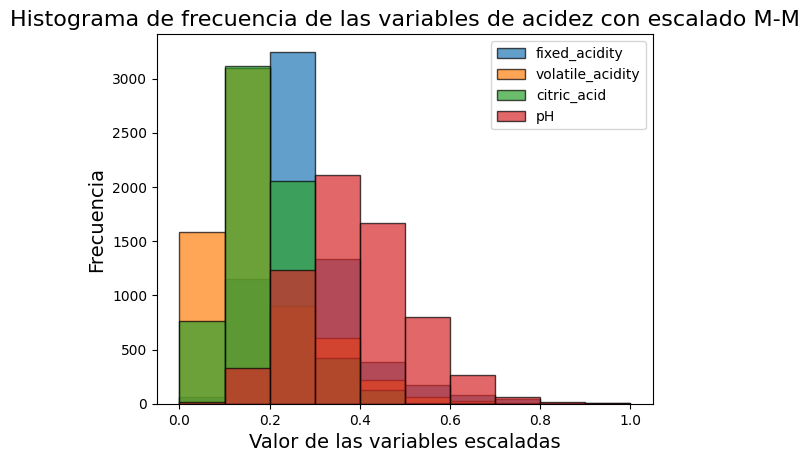

In [ ]:
# Lo volvemos a mostrar escalado
for col in df_acidez_mm.columns:
  plt.hist(df_acidez_mm[col],edgecolor='black',alpha=0.7)

plt.title('Histograma de frecuencia de las variables de acidez con escalado M-M', fontsize=16)
plt.xlabel('Valor de las variables escaladas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(['fixed_acidity','volatile_acidity','citric_acid','pH'])

plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(df_acidez)

df_acidez_st = pd.DataFrame(scaler.fit_transform(df_acidez))

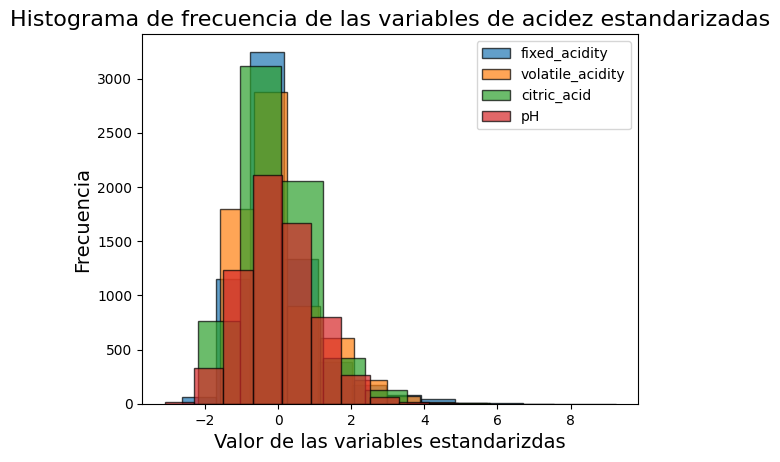

In [ ]:
for col in df_acidez_st.columns:
  plt.hist(df_acidez_st[col],edgecolor='black',alpha=0.7)

plt.title('Histograma de frecuencia de las variables de acidez estandarizadas', fontsize=16)
plt.xlabel('Valor de las variables estandarizdas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(['fixed_acidity','volatile_acidity','citric_acid','pH'])

plt.show()

Atendiendo a los histogramas podemos concluir que mediante diferentes métodos de normalización hemos demostrado que los valores de acidez se distribuyen de forma similar en los vinos

¿Tiene sentido aplicar la normalización l2 a este caso?